#### Author: John Card

#### Data Scientist & Data Analyst

2023

Contact information:
John-Card(John Card) (github.com)
https://www.linkedin.com/in/john-card-ca/


COMPETITION-SPECIFIC TERMS
COMPETITION TITLE: Titanic - Machine Learning from Disaster

COMPETITION SPONSOR: Kaggle

COMPETITION SPONSOR ADDRESS: 1600 Amphitheatre Pkwy, Mountain View, CA 94043

COMPETITION WEBSITE: https://www.kaggle.com/c/titanic

DATA ACCESS AND USE: Competition Use and Academic, Non-Commercial Use Only

## Introduction

### The goal in this Notebook is to predict survivors of the tragic sinking of the titanic based passenger information such as age, sex and socio-economic status.


Columns in the dataset
The columns present in the dataset are as follows:

    1.PassengerId: This column assigns a unique identifier for each passenger.
    
    2.Survived: Specifies whether the given passenger survived or not (1 - survived, 0 - did not survive)
    
    3.Pclass: The passenger's class. (1 = Upper Deck, 2 = Middle Deck, 3 = Lower Deck)
    
    4.Name: The name of the passenger.
    
    5.Sex: The sex of the passenger (male, female)
    
    6.Age: The age of the passenger in years. If the age is estimated, is it in the form of xx.5.
    
    7.SibSp: How many siblings or spouses the passenger had on board with them. Sibling = brother, sister, stepbrother, stepsister and Spouse = husband, wife (mistresses and fiancés were ignored)
    
    8.Parch: How many parents or children the passenger had on board with them. Parent = mother and father, child = daughter, son, stepdaughter and stepson and some children travelled only with a nanny, therefore parch=0 for them.
    
    9.Ticket: The ticket of the passenger.
    
    10.Fare: The fare amount paid by the passenger for the trip.
    
    11.Cabin: The cabin in which the passenger stayed.
    
    12.Embarked: The place from which the passenger embarked (C = Cherbourg; Q = Queenstown; S = Southampton)

In the upcoming section, I'll incorporate the necessary libraries for my analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.regression import linear_model
from scipy import stats
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Splitting data
from sklearn.model_selection import train_test_split 

# Scalers
from sklearn.preprocessing import StandardScaler, MinMaxScaler 

# Classifiers 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import time

### 1. Data Cleaning & Exploratory Data Analysis (EDA):

Following the library imports, I will tell Python to read the csv file.

In [2]:
# I am calling the Train dataframe as train and Test dataframe as test

df = pd.read_csv("train.csv")

df_test = pd.read_csv("test.csv")

Having successfully read the file, I will proceed with conducting an exploratory data analysis (EDA) to examine and analyze the dataset.

**Preparing the data**

In [3]:
# Checking the first rows in order to know what I have for my analysis

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Observing that the "Passengerid" serves as a unique identifier, I will proceed to rename certain columns in the next line for enhanced readability.

In [4]:
df.columns = ['passenger_id','survived','passenger_class','name','sex','age','sib_sp','parch','ticket','fare','cabin','embarked']

In [5]:
# Checking new columns name

df.head()

,passenger_id,survived,passenger_class,name,sex,age,sib_sp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Checking the size
df.shape

(891, 12)

As evident from the dataset, there are a total of 891 rows and 12 variables.






##### Next steps:

- **Step 1:** Check for duplicated data

- **Step 2:** Check for missing data

- **Step 3:** Check data types and formats

- **Step 4:** Data Cleaning & Handling missing values

- **Step 5:** Analyze the relationships between different features and the target variable

**Step 1**

- Check for duplicated data

In [7]:
df.duplicated().sum()

0

The dataset has no duplicates.

**Step 2**
- Check for missing data

In [8]:
# Summary

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_id     891 non-null    int64  
 1   survived         891 non-null    int64  
 2   passenger_class  891 non-null    int64  
 3   name             891 non-null    object 
 4   sex              891 non-null    object 
 5   age              714 non-null    float64
 6   sib_sp           891 non-null    int64  
 7   parch            891 non-null    int64  
 8   ticket           891 non-null    object 
 9   fare             891 non-null    float64
 10  cabin            204 non-null    object 
 11  embarked         889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


As we could see, there are missing values in the column `age`, `cabin` and `embarked`.

I will check how many:

In [9]:
df.isnull().sum()

passenger_id         0
survived             0
passenger_class      0
name                 0
sex                  0
age                177
sib_sp               0
parch                0
ticket               0
fare                 0
cabin              687
embarked             2
dtype: int64

Summarizing:

    - age -> 177 missing values
    - cabin -> 687 missing values
    - embarked -> 2 missing values

In [10]:
# Checking the percentage of missing values

df.isna().sum() / df.shape[0]*100.0

passenger_id        0.000000
survived            0.000000
passenger_class     0.000000
name                0.000000
sex                 0.000000
age                19.865320
sib_sp              0.000000
parch               0.000000
ticket              0.000000
fare                0.000000
cabin              77.104377
embarked            0.224467
dtype: float64

It's notable that the cabin column has an approximate 80% missing data, while age and embarked exhibit around 20% and 0.22% missing values, respectively. Addressing and resolving these missing values will be part of my investigation and correction process after completing Step 3.


**Step 3**
- Data-types and formats

In [11]:
# Check using .dtypes

df.dtypes

passenger_id         int64
survived             int64
passenger_class      int64
name                object
sex                 object
age                float64
sib_sp               int64
parch                int64
ticket              object
fare               float64
cabin               object
embarked            object
dtype: object

Based on the above findings, the dataset comprises a diverse range of data types, including both string and numeric formats across various variables.

Having reviewed the dataset, I will now initiate the process of rectifying some of the identified issues.

**Early assumptions**

Considerations:

- `passenger_id` and `name` should not give us any helpful information about the objective of this work. Therefore, I will drop both columns.



- As a result of the above code, we observed the existence of missing values in the columns `age`, `cabin`, and `embarked`. The `cabin` column missing values are probably related to some of the passengers do not have a cabin. Therefore, I will input the information manually. However, the columns `age` and `embarked` missing values are probably just missing data.



- As we could observe previously, there is a mixing of categorical and numerical columns in our dataset. I need to check which categorical column I am able to turn into a numerical column.

**Step 4**
- Data Cleaning & Handling missing values

*First I will execute the code to drop the `passenger_id` and `name` columns.*

In [12]:
df.drop('passenger_id', axis=1, inplace=True)
df.drop('name', axis=1, inplace=True)

In [13]:
# Checking if it worked

df.head(2)

,survived,passenger_class,sex,age,sib_sp,parch,ticket,fare,cabin,embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C


Next, I will transform the `sex` column into numerical by converting into a binary in the following way:

*Female - 0*

*Male - 1*

In [14]:
df['sex'] = np.where(df['sex']=='female', 0, 1)

In [15]:
# Checking if it worked

df.head(2)

,survived,passenger_class,sex,age,sib_sp,parch,ticket,fare,cabin,embarked
0,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C


Now I will investigate the `age` column to fix the NaN issue.

- Age


It appears about 20% of data is missing in the `age` column. Let us now investigate the distribution of age in the data in order to be able to move forward. We can agree that 20% of the data is too much to drop in this case.

In [16]:
df['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [17]:
df['age'].median()

28.0

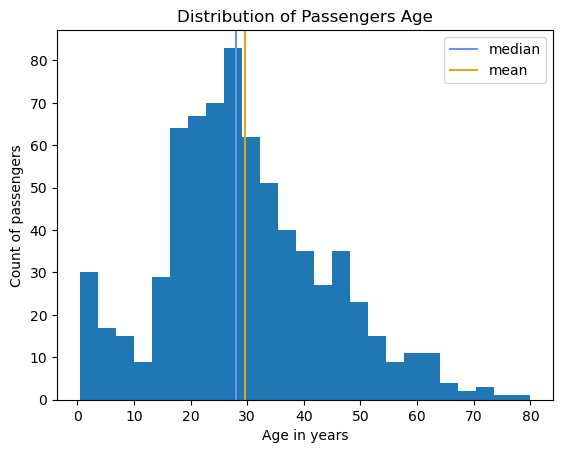

In [18]:
# Visualize
plt.figure()

plt.hist(df['age'], bins=25)

# Overplot mean and median ages
plt.axvline(df['age'].median(), color='cornflowerblue', label='median')
plt.axvline(df['age'].mean(), color='goldenrod', label='mean')

plt.title('Distribution of Passengers Age')
plt.xlabel('Age in years')
plt.ylabel('Count of passengers')
plt.legend()

plt.show()

Examining the data above, it is evident that the age distribution exhibits a somewhat normal shape with a right skew. The majority of passengers fall within the age range of approximately 15 to 30 years. Notably, there are few passengers aged 50 and above. A notable observation is the steep rise in the age group of approximately 12 to 15 years, with very few passengers aged 65 and above. The age bin with the highest frequency appears to be around 28 years old.

In [20]:
df['age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: age, Length: 88, dtype: int64

However the median is 28 years old, since the age with most passengers is 24 years old, I will input the missing ages as age 24.

In [21]:
df['age'] = df['age'].fillna(24.0)

In [22]:
# Checking

df['age'].isna().sum()

0

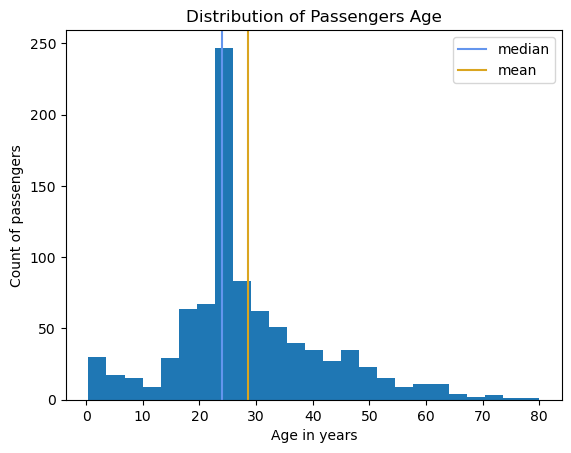

In [23]:
# Visualize
plt.figure()

plt.hist(df['age'], bins=25)

# Overplot mean and median ages
plt.axvline(df['age'].median(), color='cornflowerblue', label='median')
plt.axvline(df['age'].mean(), color='goldenrod', label='mean')

plt.title('Distribution of Passengers Age')
plt.xlabel('Age in years')
plt.ylabel('Count of passengers')
plt.legend()

plt.show()

Age is done. What else is missing?

In [24]:
df.isna().sum()

survived             0
passenger_class      0
sex                  0
age                  0
sib_sp               0
parch                0
ticket               0
fare                 0
cabin              687
embarked             2
dtype: int64

Now we must address imputing values for *categorical* data such as `cabin`and `embarked`.

- Cabin column - categorical

First, let us look at all the distinct values for the `cabin` column.

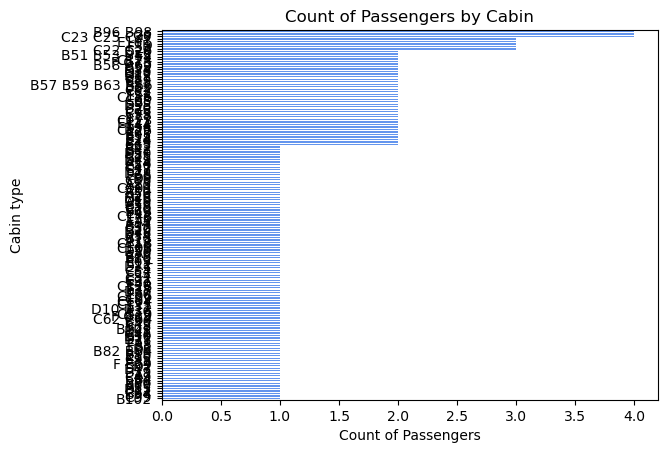

In [25]:
df['cabin'].value_counts().sort_values().plot(kind='barh', color='cornflowerblue')
plt.title('Count of Passengers by Cabin')
plt.ylabel('Cabin type')
plt.xlabel('Count of Passengers')
plt.show()

Evidently, there are a lot of distinct cabins! Let's make this visual a bit taller.

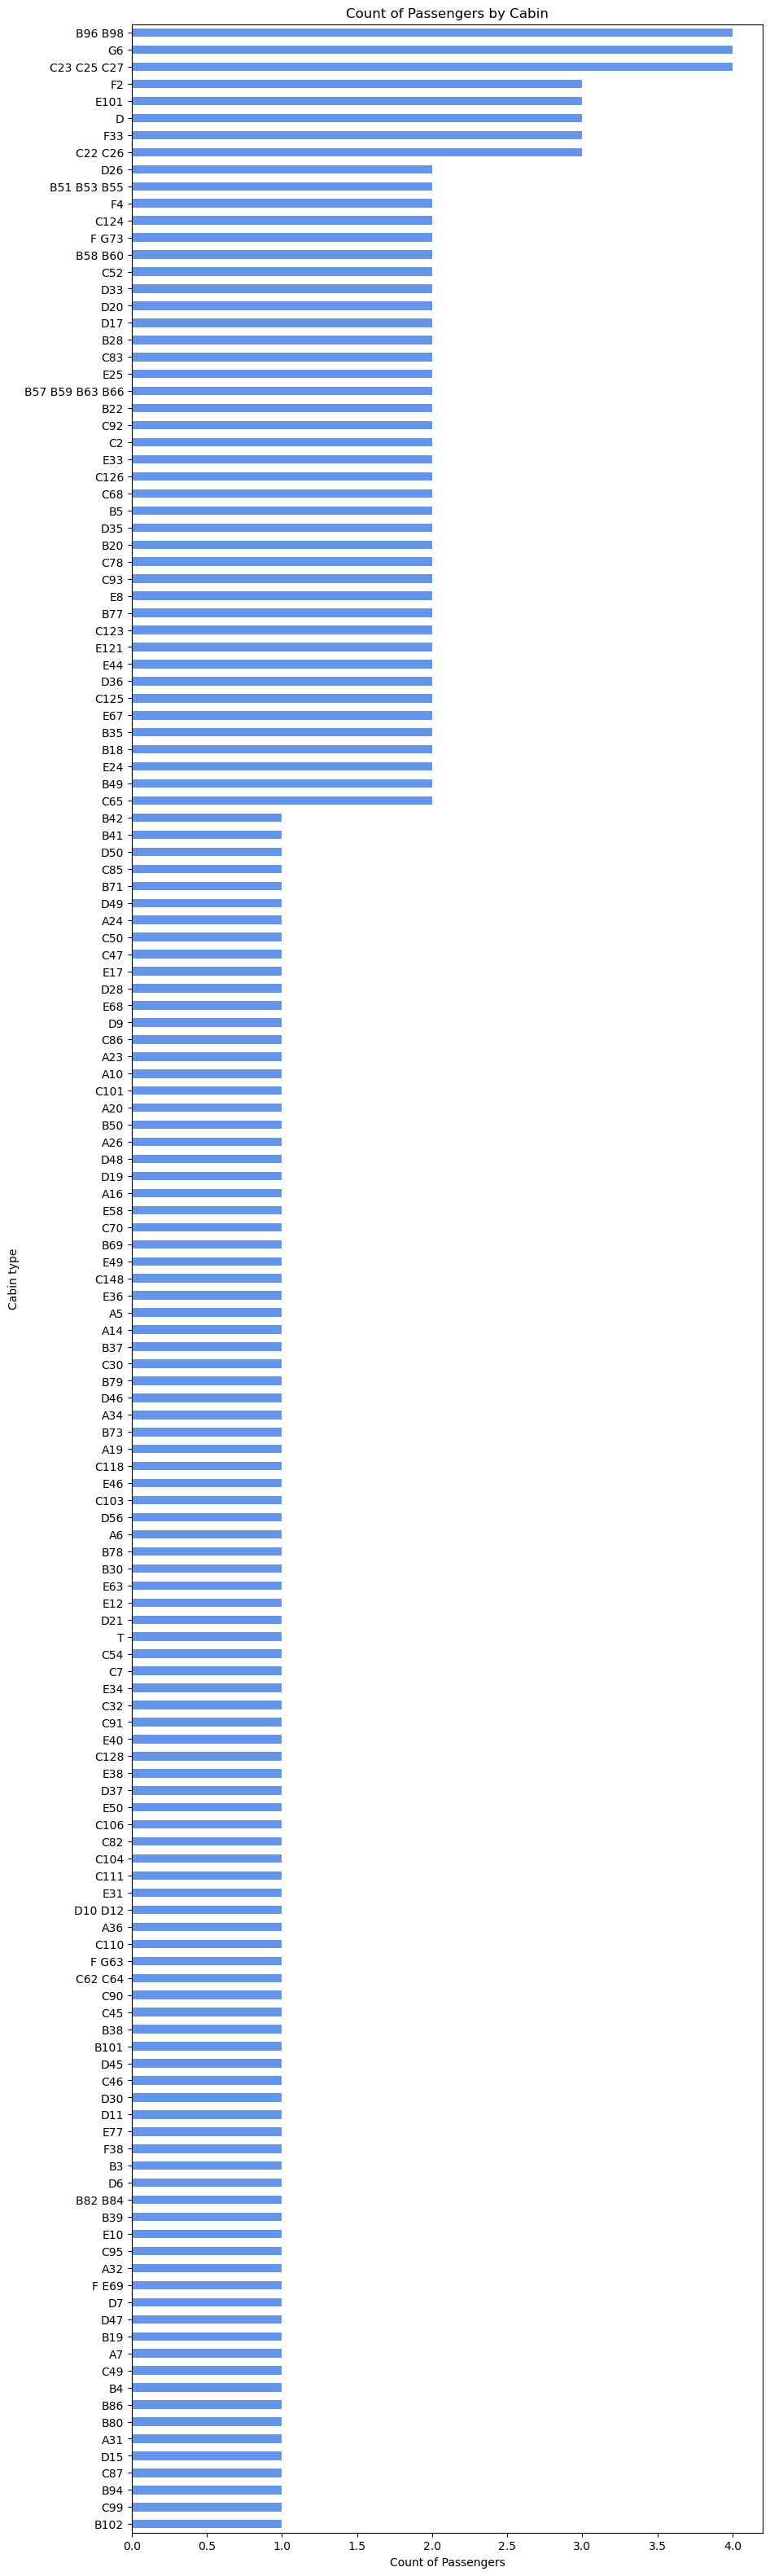

In [26]:
plt.figure(figsize=(10, 40))
df['cabin'].value_counts().sort_values().plot(kind='barh', color='cornflowerblue')
plt.title('Count of Passengers by Cabin')
plt.ylabel('Cabin type')
plt.xlabel('Count of Passengers')
plt.show()

In [28]:
df['cabin'].value_counts(normalize=True)*100.0

B96 B98        1.960784
G6             1.960784
C23 C25 C27    1.960784
C22 C26        1.470588
F33            1.470588
                 ...   
E34            0.490196
C7             0.490196
C54            0.490196
E36            0.490196
C148           0.490196
Name: cabin, Length: 147, dtype: float64

While the graphic alone may not provide conclusive insights, the tabulated data indicates that the majority of passengers occupy cabins labeled as B96, B98, G6, C23, C25, and C27. A smaller number is associated with cabins such as E34, C7, C54, E36, and C148.

Considering our assumption that missing data in the cabin column may imply passengers without assigned cabins, I will impute these missing values with the label unknown.

In [29]:
# Set missing values as unknown

df['cabin'] = df['cabin'].fillna('unknown')

In [30]:
# Check
df['cabin'].isna().sum()

0

- Embarked column - categorical

Let's take a look at the distinct counts for the embarked column:

In [31]:
df['embarked'].value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: embarked, dtype: float64

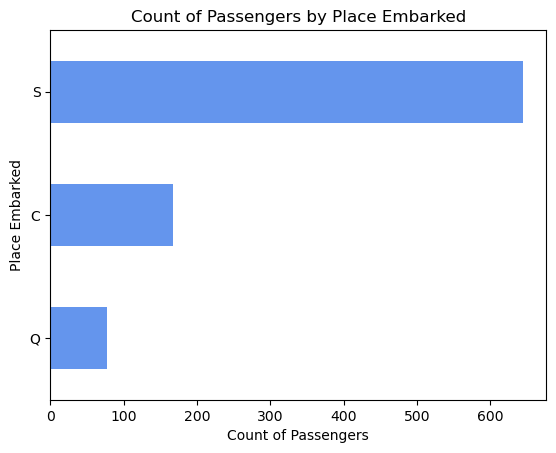

In [32]:
df['embarked'].value_counts().sort_values().plot(kind='barh', color='cornflowerblue')
plt.title('Count of Passengers by Place Embarked')
plt.ylabel('Place Embarked')
plt.xlabel('Count of Passengers')
plt.show()

Looking at the above, a great deal of passengers embarked by `S` (~73%). On the other hand, less than 10% of the passengers embarked by `Q`.

In order to fix the NaN issue, since there are only two missing values, I will fill in the missing data as `C`.

In [35]:
# Set missing values to unknown

df['embarked'] = df['embarked'].fillna('C')

In [34]:
# Checking

df['embarked'].isna().sum()

0

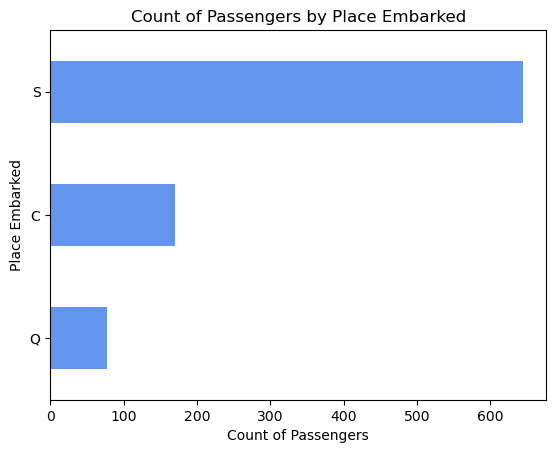

In [36]:
df['embarked'].value_counts().sort_values().plot(kind='barh', color='cornflowerblue')
plt.title('Count of Passengers by Place Embarked')
plt.ylabel('Place Embarked')
plt.xlabel('Count of Passengers')
plt.show()

In [37]:
df['embarked'].value_counts(normalize=True)

S    0.722783
C    0.190797
Q    0.086420
Name: embarked, dtype: float64

In [38]:
df.isna().sum()

survived           0
passenger_class    0
sex                0
age                0
sib_sp             0
parch              0
ticket             0
fare               0
cabin              0
embarked           0
dtype: int64

Great! With all missing values successfully imputed, we can now move forward with a more detailed exploratory data analysis. Additionally, the absence of missing values instills confidence in proceeding with modeling work.

 **Step 5:** 
 - Analyze the relationships between different features and the target variable

Having completed the data cleaning process, let's delve into the analysis to answer our initial question: Can we predict survivors of the tragic sinking of the Titanic based on passenger information, including age, sex, and socio-economic status?

To facilitate our analysis, we'll categorize the data into two groups: categorical and numeric. Before proceeding, I'll first examine the unique values present in each column.

- Summary of the unique values for each column:

In [39]:
df.nunique()

survived             2
passenger_class      3
sex                  2
age                 88
sib_sp               7
parch                7
ticket             681
fare               248
cabin              148
embarked             3
dtype: int64

Now, I will check which column individually:

In [40]:
df['survived'].unique

<bound method Series.unique of 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64>

In [41]:
df['survived'].nunique()

2

As we could see, there are only two unique values in the `suvived` column. Where `1` is when the passenger survived and `0` otherwise.

In [43]:
df['passenger_class'].unique

<bound method Series.unique of 0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: passenger_class, Length: 891, dtype: int64>

In [44]:
df['passenger_class'].nunique()

3

There are three classes: `1`, `2` and `3`. As explained before: `1= Upped Deck`, `2= Middle Deck` and `3= Lower Deck`.

In [45]:
df['sex'].unique

<bound method Series.unique of 0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: sex, Length: 891, dtype: int32>

In [46]:
df['sex'].nunique()

2

As we could see, as the result of the transformation into binary, there are only two unique values in the `sex` column. Where `female = 1` and `male = 0`.

In [47]:
df['age'].unique

<bound method Series.unique of 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64>

In [48]:
df['age'].nunique()

88

There are 88 unique values for the `age` column.

In [49]:
df['sib_sp'].unique

<bound method Series.unique of 0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    1
889    0
890    0
Name: sib_sp, Length: 891, dtype: int64>

In [50]:
df['sib_sp'].nunique()

7

As we could observe from above, there are 7 different values in the `sib_sp` column.

In [51]:
df['parch'].unique

<bound method Series.unique of 0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    2
889    0
890    0
Name: parch, Length: 891, dtype: int64>

In [ ]:
df['parch'].nunique()

As we could observe from above, there are 7 different values in the `parch` column.

In [52]:
df['ticket'].unique

<bound method Series.unique of 0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: ticket, Length: 891, dtype: object>

In [53]:
df['ticket'].nunique()

681

There are 681 unique values for the `ticket` column.

In [54]:
df['fare'].unique

<bound method Series.unique of 0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: fare, Length: 891, dtype: float64>

In [55]:
df['fare'].nunique()

248

In the `fare` column, there are 248 unique values.

In [56]:
df['cabin'].unique

<bound method Series.unique of 0      unknown
1          C85
2      unknown
3         C123
4      unknown
        ...   
886    unknown
887        B42
888    unknown
889       C148
890    unknown
Name: cabin, Length: 891, dtype: object>

In [57]:
df['cabin'].nunique()

148

As we could see, there are 148 different `cabin`. However, as we know, there are a few passengers with no cabin.

In [58]:
df['embarked'].unique

<bound method Series.unique of 0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object>

In [59]:
df['embarked'].nunique()

3

The passengers embarked in three different ways.

**Now that I investigated the unique values, I will explore the data to understand better the information**

Let check how many passengers survived:

In [60]:
# I am creating a copy dataframe to not change the original data for now

df_1 = df.copy()

In [61]:
# I will rename the 0 & 1 of the column survived. Where 1 I am calling Survived and 0 Not Survived

df_1['survived'].replace({1: "Survived", 0: "Not Survived"}, inplace=True)

In [62]:
# I will rename the 0 & 1 of the column survived. Where 1 I am calling Survived and 0 Not Survived

df_1['sex'].replace({1: "Male", 0: "Female"}, inplace=True)

In [63]:
# Checking if it worked

df_1.head()

,survived,passenger_class,sex,age,sib_sp,parch,ticket,fare,cabin,embarked
0,Not Survived,3,Male,22.0,1,0,A/5 21171,7.2500,unknown,S
1,Survived,1,Female,38.0,1,0,PC 17599,71.2833,C85,C
2,Survived,3,Female,26.0,0,0,STON/O2. 3101282,7.9250,unknown,S
3,Survived,1,Female,35.0,1,0,113803,53.1000,C123,S
4,Not Survived,3,Male,35.0,0,0,373450,8.0500,unknown,S


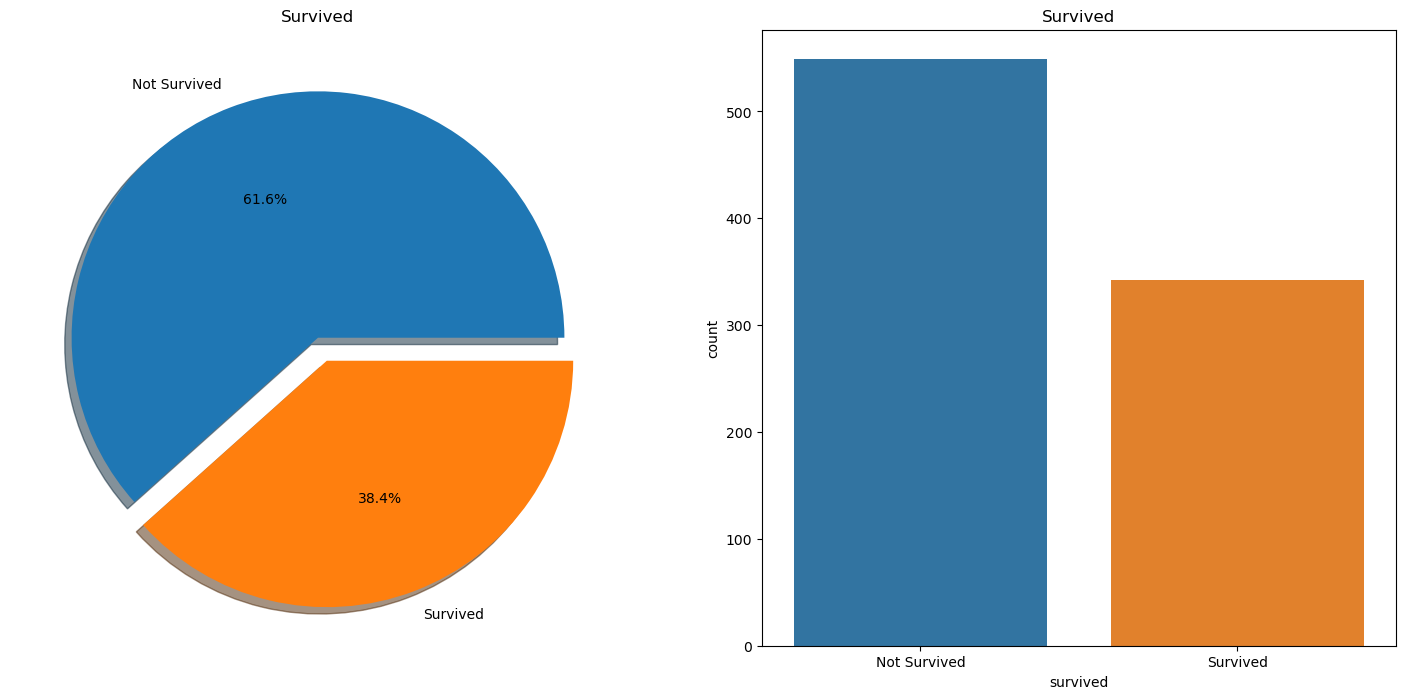

In [64]:
f, ax = plt.subplots(1,2, figsize=(18,8))
df_1['survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot(x='survived', data=df_1, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

As anticipated, we can observe that less than half of the passengers survived the tragedy, with approximately 340 individuals (38%) from the training dataset having survived.

Further investigation is required to comprehend the characteristics and categories of passengers who survived and those who did not.

In [65]:
df_1.groupby(['sex', 'survived'])['survived'].count()
# Column Sex: 
# Female- 0 & Male- 1

# Column Survived:
# Not survived- 0 & Survived- 1

sex     survived    
Female  Not Survived     81
        Survived        233
Male    Not Survived    468
        Survived        109
Name: survived, dtype: int64

In [66]:
# I will create another copy of df because df_1 will not work due to not having numeric data in the column survived

df_2 = df.copy()

In [67]:
df_2['sex'].replace({1: "Male", 0: "Female"}, inplace=True)

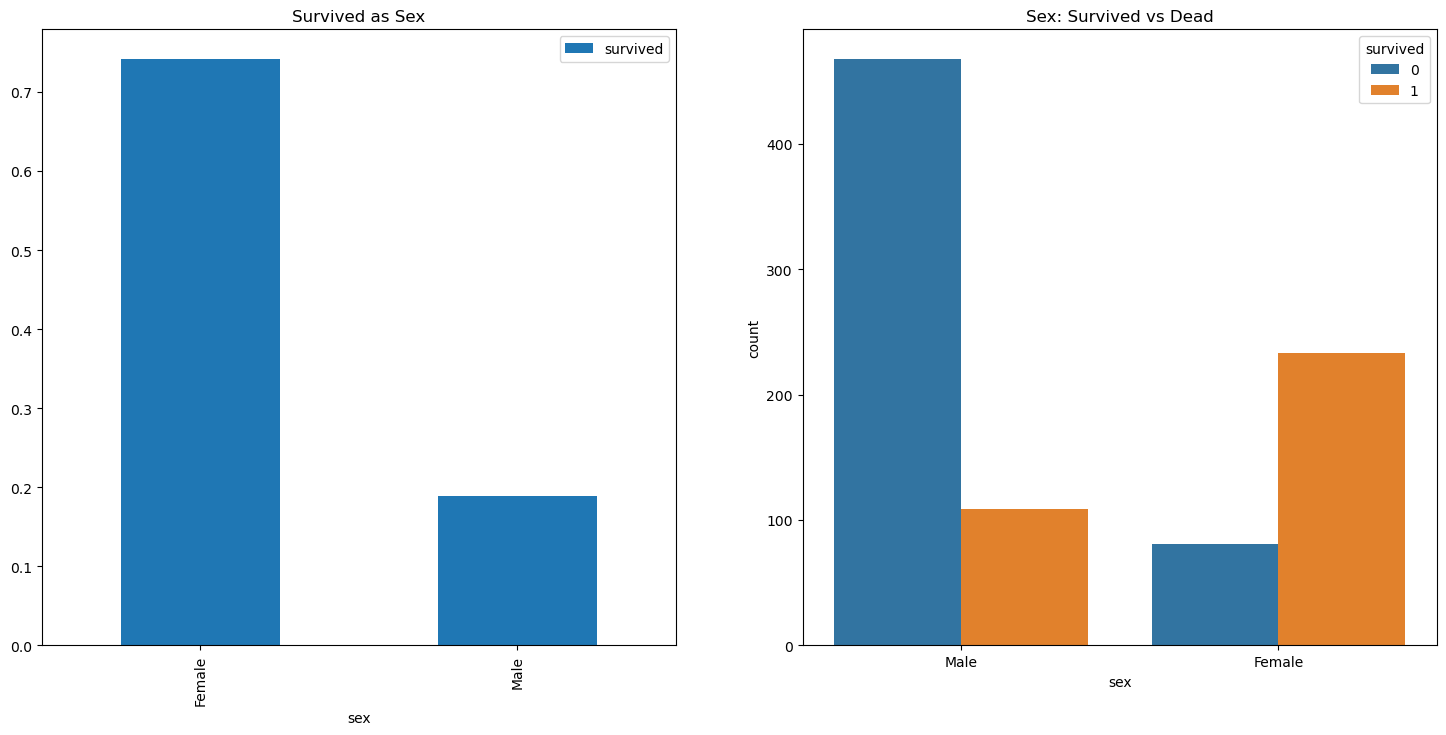

In [68]:
f, ax = plt.subplots(1,2, figsize=(18,8))
df_2[['sex', 'survived']].groupby(['sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived as Sex')
sns.countplot(x='sex', hue='survived', data=df_2, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

Indeed, the data reveals a significant contrast in survival rates between male and female passengers. Despite the total number of male passengers being nearly twice that of female passengers, the survival rate among females was substantially higher. Approximately 74% of female passengers survived, while the survival rate for male passengers was notably lower, around 19%. This information underscores the impact of gender on survival outcomes in the tragic sinking of the Titanic.

Now, I will compare the numbers of survivors based on the type of class using the original data frame (df).

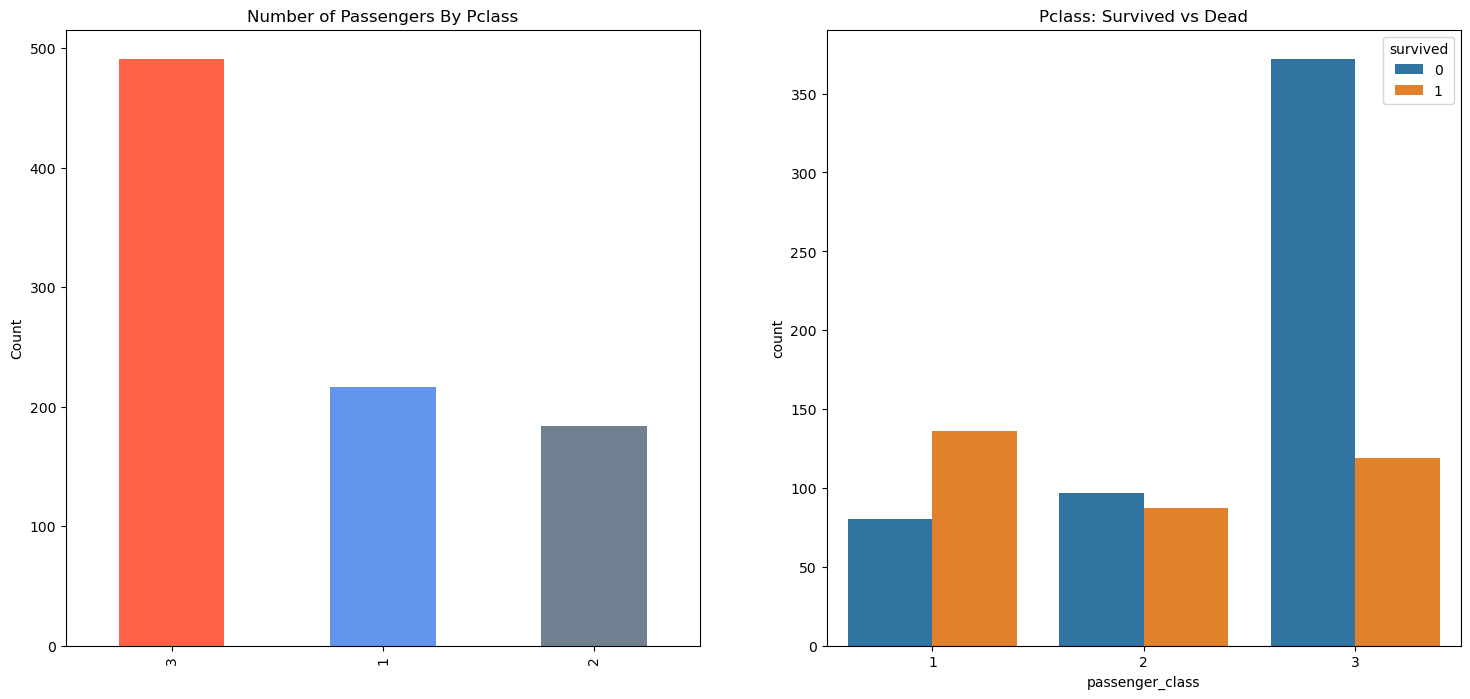

In [69]:
f, ax = plt.subplots(1,2, figsize=(18,8))
df['passenger_class'].value_counts().plot.bar(color=['tomato','cornflowerblue','slategray'],ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='passenger_class', hue='survived', data=df, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

In [70]:
pd.crosstab(df_1.passenger_class, df_1.survived, margins=True).style.background_gradient(cmap='YlOrRd')

survived,Not Survived,Survived,All
passenger_class,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


As you can obserdve, there is a notable discrepancy in survival rates across different passenger classes. Despite Class 3 having the highest number of passengers, the survival rates reveal a prioritization of rescue efforts for passengers in Class 1. Class 1 exhibited a survival rate of approximately 62.96%, Class 2 had a rate of 47.28%, while Class 3 had the lowest rate at 24.23%.

Certainly, let's proceed with using a crosstab that includes passenger sex for a more detailed analysis. Feel free to provide additional instructions or let me know if you'd like specific insights from the crosstab.

In [71]:
pd.crosstab([df_1.sex, df_1.survived], df_1.passenger_class, margins=True).style.background_gradient(cmap='YlOrRd')

The crosstab analysis indeed provides clear insights into the survival patterns based on passenger class and gender. Specifically, for female passengers in Class 1, the survival rate is notably high, with only 3 out of 94 women not surviving (3.19% of the total). On the other hand, in Class 3, 72 out of 144 women did not survive, accounting for 50% of the total female passengers in that class.

Furthermore, the overall trend indicates that, irrespective of the class, women were given higher priority in the rescue efforts compared to male passengers. This underscores the evident impact of both gender and class on survival outcomes during the Titanic tragedy.

In [72]:
# Geting the summary stats for numeric columns

df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
passenger_class,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
sex,891.0,0.647587,0.477990,0.00,0.0000,1.0000,1.0,1.0000
age,891.0,28.566970,13.199572,0.42,22.0000,24.0000,35.0,80.0000
sib_sp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


Standard deviation tells us about the variability of values in the dataset. As we could see, the Std is close to zero for most of the variants, however, age and specially fare demonstrated a big variation.

I will use a histogram to see the distribution of age and fare columns with the mean and median.

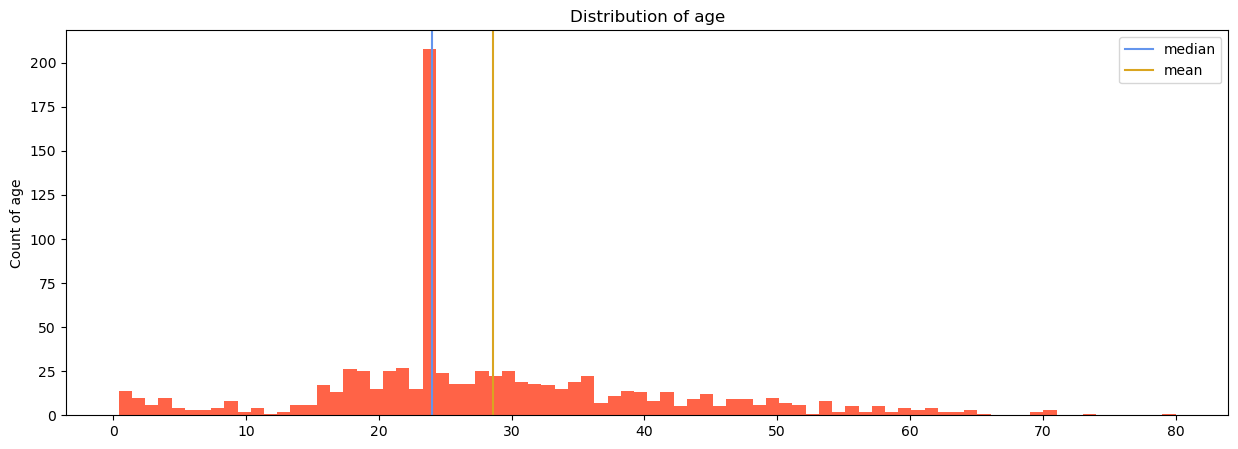

In [78]:
plt.figure(figsize=(15, 5))

plt.hist(df['age'], bins=80, color='tomato')

# Overplot mean and median ages
plt.axvline(df['age'].median(), color='cornflowerblue', label='median')
plt.axvline(df['age'].mean(), color='goldenrod', label='mean')


plt.title('Distribution of age')
plt.ylabel('Count of age')
plt.legend()

plt.show()

Checking the above graphic, if we ignore the peak around 25, the distribution of age appears to be normal ish.

The median is located close to that peak at age of 25 years old, while the mean close to 28 years old.

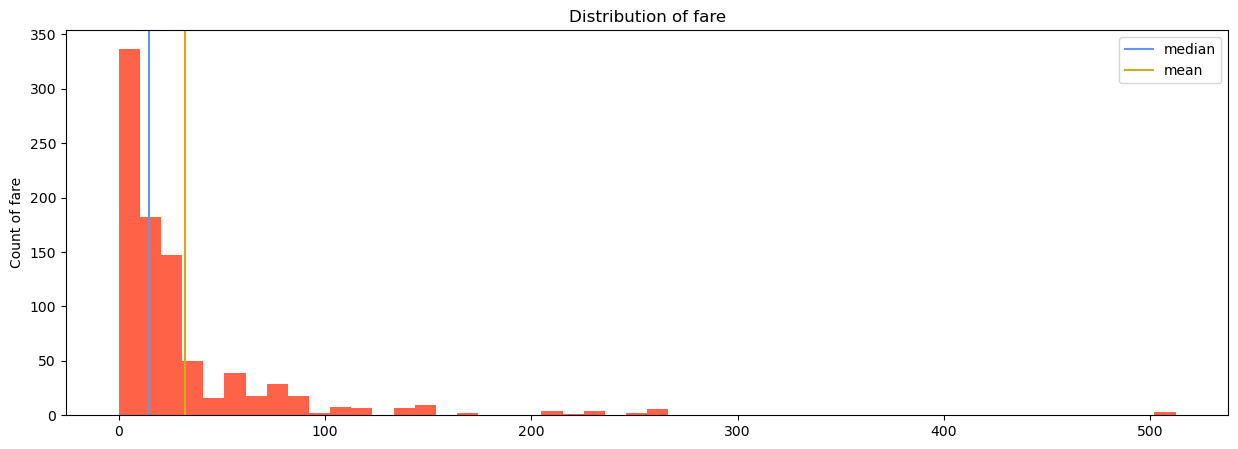

In [79]:
plt.figure(figsize=(15, 5))

plt.hist(df['fare'], bins=50, color='tomato')

# Overplot mean and median ages
plt.axvline(df['fare'].median(), color='cornflowerblue', label='median')
plt.axvline(df['fare'].mean(), color='goldenrod', label='mean')


plt.title('Distribution of fare')
plt.ylabel('Count of fare')
plt.legend()

plt.show()

The distribution of fare appears to be more of a right-skewed type distribution. The median would look to be close to the peak of the distribution. While the mean would be closer to the lower side.

Now that I have checked the distribution of some of the numeric columns, I would like to check the covariance and correlation between these columns.

In [76]:
df.cov()

,survived,passenger_class,sex,age,sib_sp,parch,fare
survived,0.236772,-0.137703,-0.126376,-0.339588,-0.018954,0.032017,6.221787
passenger_class,-0.137703,0.699015,0.052712,-3.930805,0.076599,0.012429,-22.830196
sex,-0.126376,0.052712,0.228475,0.462953,-0.060422,-0.094584,-4.330946
age,-0.339588,-3.930805,0.462953,174.228695,-3.382908,-1.650393,70.548131
sib_sp,-0.018954,0.076599,-0.060422,-3.382908,1.216043,0.368739,8.748734
parch,0.032017,0.012429,-0.094584,-1.650393,0.368739,0.649728,8.661052
fare,6.221787,-22.830196,-4.330946,70.548131,8.748734,8.661052,2469.436846


Upon observing the covariance table, it is evident that passenger class, age, and sex exhibit a negative covariance with the "survived" column. To delve deeper into these relationships, we will examine the Correlation Matrix for a more comprehensive understanding.

In [80]:
df.corr()

,survived,passenger_class,sex,age,sib_sp,parch,fare
survived,1.000000,-0.338481,-0.543351,-0.052872,-0.035322,0.081629,0.257307
passenger_class,-0.338481,1.000000,0.131900,-0.356187,0.083081,0.018443,-0.549500
sex,-0.543351,0.131900,1.000000,0.073377,-0.114631,-0.245489,-0.182333
age,-0.052872,-0.356187,0.073377,1.000000,-0.232411,-0.155118,0.107554
sib_sp,-0.035322,0.083081,-0.114631,-0.232411,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.245489,-0.155118,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,-0.182333,0.107554,0.159651,0.216225,1.000000


For a better visualization, I will show the correlation in a heat map.

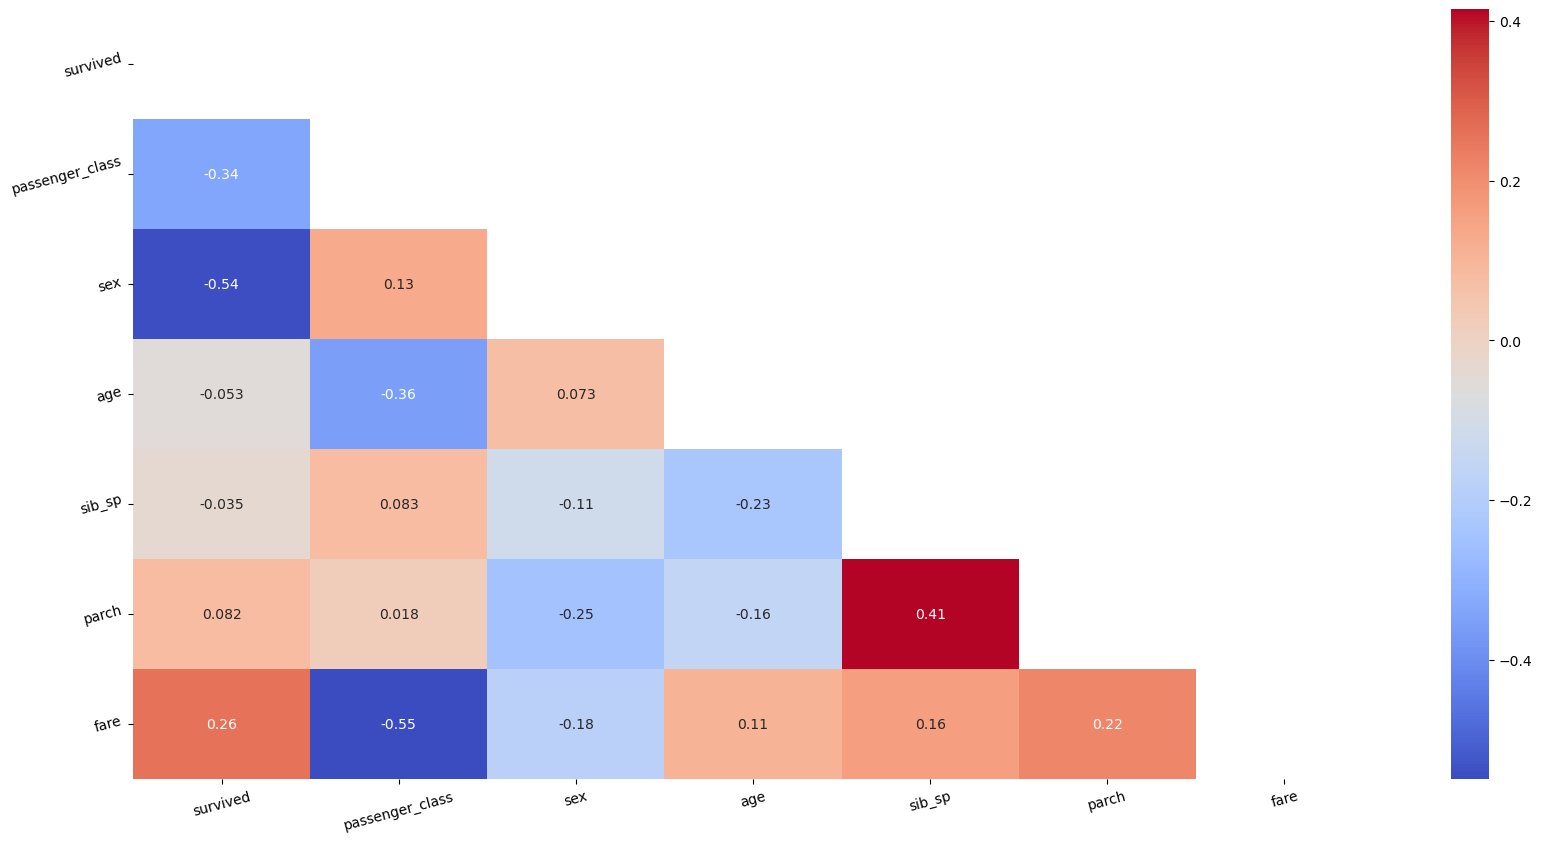

In [81]:
plt.figure(figsize=(20,10))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, mask=matrix, cmap='coolwarm')
plt.xticks(rotation=15)
plt.yticks(rotation=15)
plt.show()

Positive Correlation: When an increase in feature A corresponds to an increase in feature B, they are positively correlated. A correlation value of 1 indicates perfect positive correlation.

Negative Correlation: When an increase in feature A corresponds to a decrease in feature B, they are negatively correlated. A correlation value of -1 signifies perfect negative correlation.

Examining the heatmap above, the highest correlation is identified between "sib_sp" and "parch" (0.41). Consequently, we can proceed with considering all features for analysis.

 *****
### 2. Feature Engineering

Feature engineering is a crucial process involving the examination, extraction, and organization of essential features from the dataset. It allows for the creation of new features derived from existing ones, potentially enhancing the model's performance.

In this phase, I will explore the features to identify opportunities for creating new variables that can contribute to the improvement of the model.

**Age Group**

Age is a good feature that we can easily separate into groups/bands.

The maximum age of the passenger was 80. Therefore, we can divide it in 5 different groups and rearrange it into groups of 16 (80/5=16).

In [82]:
df['age_group'] = 0
df.loc[df['age']<=16, 'age_group'] = 0
df.loc[(df['age']>16)&(df['age']<=32), 'age_group'] = 1
df.loc[(df['age']>32)&(df['age']<=48), 'age_group'] = 2
df.loc[(df['age']>48)&(df['age']<=64), 'age_group'] = 3
df.loc[df['age']>64, 'age_group'] = 4
df.head() # Check if worked

,survived,passenger_class,sex,age,sib_sp,parch,ticket,fare,cabin,embarked,age_group
0,0,3,1,22.0,1,0,A/5 21171,7.2500,unknown,S,1
1,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C,2
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,unknown,S,1
3,1,1,0,35.0,1,0,113803,53.1000,C123,S,2
4,0,3,1,35.0,0,0,373450,8.0500,unknown,S,2


In [83]:
# checking the number of passengers in each group.
df['age_group'].value_counts().to_frame().style.background_gradient(cmap='coolwarm')

,age_group
1,523
2,188
0,100
3,69
4,11


**Family Size vs Alone**

Another important feature we could create is based on the family size of the passenger. We could combine the variables 'parch' and 'sib_sp' to check if survival rate has any connection with family size of the passengers. In addition, 'alone' will present whether a passenger is alone or not.

In [88]:
df['family_size'] = 0
df['family_size'] = df['parch'] + df['sib_sp'] # family size
df['alone'] = 0
df.loc[df.family_size == 0, 'alone'] = 1 # Alone

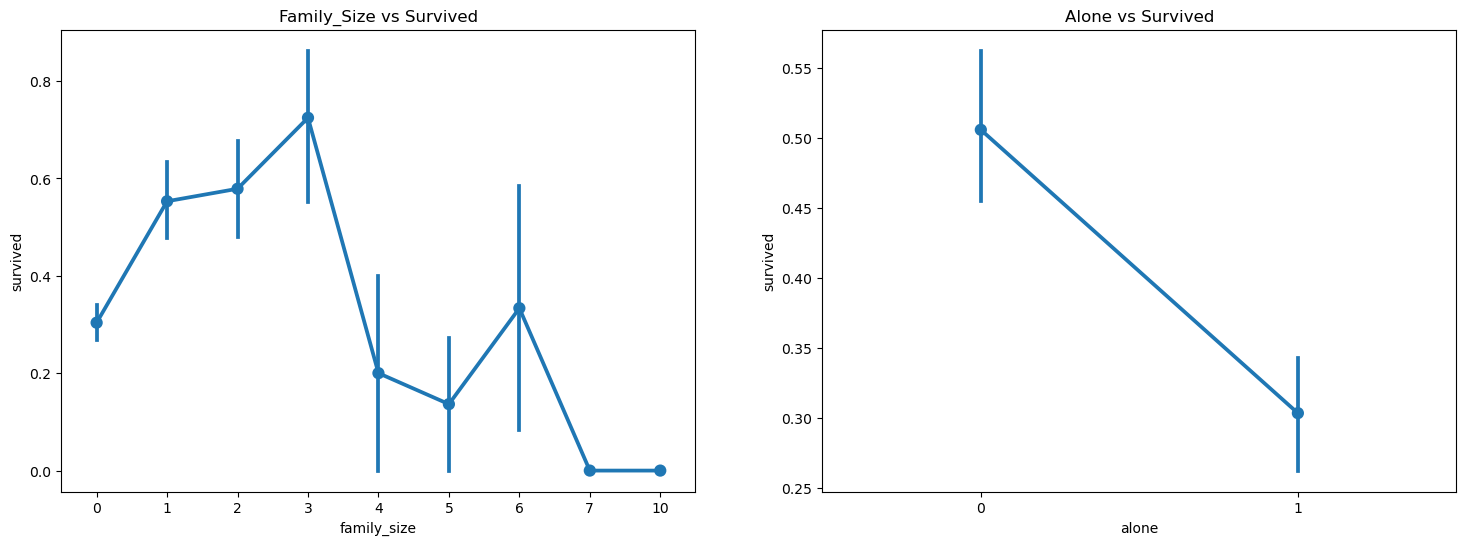

In [89]:
f, ax = plt.subplots(1,2, figsize=(18,6))
sns.pointplot(x='family_size', y='survived', data=df, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.pointplot(x='alone', y='survived', data=df, ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

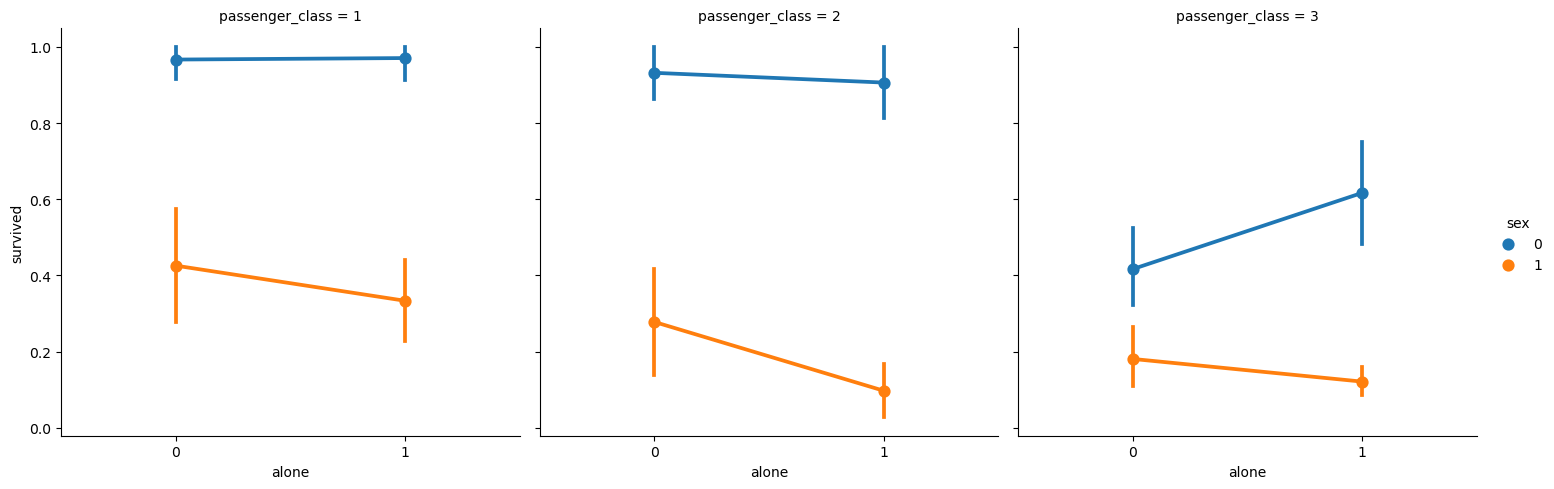

In [90]:
sns.catplot(x='alone', y='survived', data=df, hue='sex', col='passenger_class', kind='point')
plt.show()

By looking at the above graphic, it is possible to conclude that being alone is harmfull irrespective of 'sex' of the 'passenger_class' except for 'passenger_class'=3. When 'passenger_class'=3, the chances of the female passenger to survive when being alone is higher than those with a family.

**Fare Range**

In [91]:
df.head() # to have a look on the available variables

,survived,passenger_class,sex,age,sib_sp,parch,ticket,fare,cabin,embarked,age_group,family_size,alone
0,0,3,1,22.0,1,0,A/5 21171,7.2500,unknown,S,1,1,0
1,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C,2,1,0
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,unknown,S,1,0,1
3,1,1,0,35.0,1,0,113803,53.1000,C123,S,2,1,0
4,0,3,1,35.0,0,0,373450,8.0500,unknown,S,2,0,1


By looking at the available variables, we see that 'fare' is a continuous variable that could be converted into ordinal value in order to produce more insights.

Therefore, we will use pandas.cut to split equally the values into 5 beans.

In [92]:
df['fare_group'] = pd.qcut(df['fare'], 5)
df.groupby(['fare_group'])['survived'].mean().to_frame().style.background_gradient(cmap='coolwarm')

,survived
fare_group,
"(-0.001, 7.854]",0.217877
"(7.854, 10.5]",0.201087
"(10.5, 21.679]",0.424419
"(21.679, 39.688]",0.444444
"(39.688, 512.329]",0.642045


As we discussed earlier, fare has a great deal of impact on chances of survival.

In order to have better results in our model, we need to adjust the values and put them into groups as we did before. 

In [93]:
df['fare_cat'] = 0
df.loc[df['fare']<=7.91, 'fare_cat'] = 0
df.loc[(df['fare']>7.91)&(df['fare']<=14.454), 'fare_cat'] = 1
df.loc[(df['fare']>14.454)&(df['fare']<=31.0), 'fare_cat'] = 2
df.loc[(df['fare']>=31.0)&(df['fare']<=512.329), 'fare_cat'] = 3

In [94]:
# Checking
df.head()

,survived,passenger_class,sex,age,sib_sp,parch,ticket,fare,cabin,embarked,age_group,family_size,alone,fare_group,fare_cat
0,0,3,1,22.0,1,0,A/5 21171,7.2500,unknown,S,1,1,0,"(-0.001, 7.854]",0
1,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C,2,1,0,"(39.688, 512.329]",3
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,unknown,S,1,0,1,"(7.854, 10.5]",1
3,1,1,0,35.0,1,0,113803,53.1000,C123,S,2,1,0,"(39.688, 512.329]",3
4,0,3,1,35.0,0,0,373450,8.0500,unknown,S,2,0,1,"(7.854, 10.5]",1


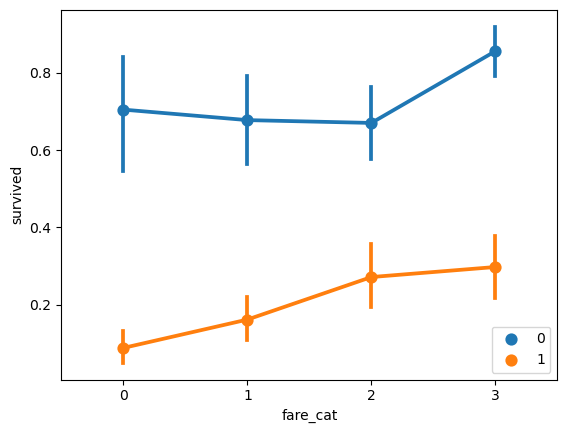

In [95]:
sns.pointplot(x='fare_cat', y='survived', data=df, hue='sex')
plt.legend(loc='best')
plt.show()

It is possible to conclude that as the fare_cat increases, the survival chances also increase.

In [97]:
df.head()

,survived,passenger_class,sex,age,sib_sp,parch,ticket,fare,cabin,embarked,age_group,family_size,alone,fare_group,fare_cat
0,0,3,1,22.0,1,0,A/5 21171,7.2500,unknown,S,1,1,0,"(-0.001, 7.854]",0
1,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C,2,1,0,"(39.688, 512.329]",3
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,unknown,S,1,0,1,"(7.854, 10.5]",1
3,1,1,0,35.0,1,0,113803,53.1000,C123,S,2,1,0,"(39.688, 512.329]",3
4,0,3,1,35.0,0,0,373450,8.0500,unknown,S,2,0,1,"(7.854, 10.5]",1


Now that we have worked with our variables, we can drop some features that will not be useful for our modeling.

**Age**- We created the age_group, so we do not need this variable

**Tickets**- This variable is too difficult to categorize

**Fare & Fare_Group**- We have created fare_group, so we do not need this variable

**Cabin**- This variable has to many NaN and is very difficult to categorize

In [98]:
# dropping the above variables

df.drop(['age','ticket','fare','cabin','fare_group'], axis=1, inplace=True)

In [99]:
# Checking if it worked

df.head()

,survived,passenger_class,sex,sib_sp,parch,embarked,age_group,family_size,alone,fare_cat
0,0,3,1,1,0,S,1,1,0,0
1,1,1,0,1,0,C,2,1,0,3
2,1,3,0,0,0,S,1,0,1,1
3,1,1,0,1,0,S,2,1,0,3
4,0,3,1,0,0,S,2,0,1,1


It looks like we have forgoten to convert the variable 'embarked' into numeric value.

So, before starting modeling, we need to do it.

In [100]:
df['embarked'].replace(['S','C','Q'],[0,1,2], inplace=True)

In [101]:
# Checking

df.head()

,survived,passenger_class,sex,sib_sp,parch,embarked,age_group,family_size,alone,fare_cat
0,0,3,1,1,0,0,1,1,0,0
1,1,1,0,1,0,1,2,1,0,3
2,1,3,0,0,0,0,1,0,1,1
3,1,1,0,1,0,0,2,1,0,3
4,0,3,1,0,0,0,2,0,1,1


Now, we can use the heat map to check on ou variables:

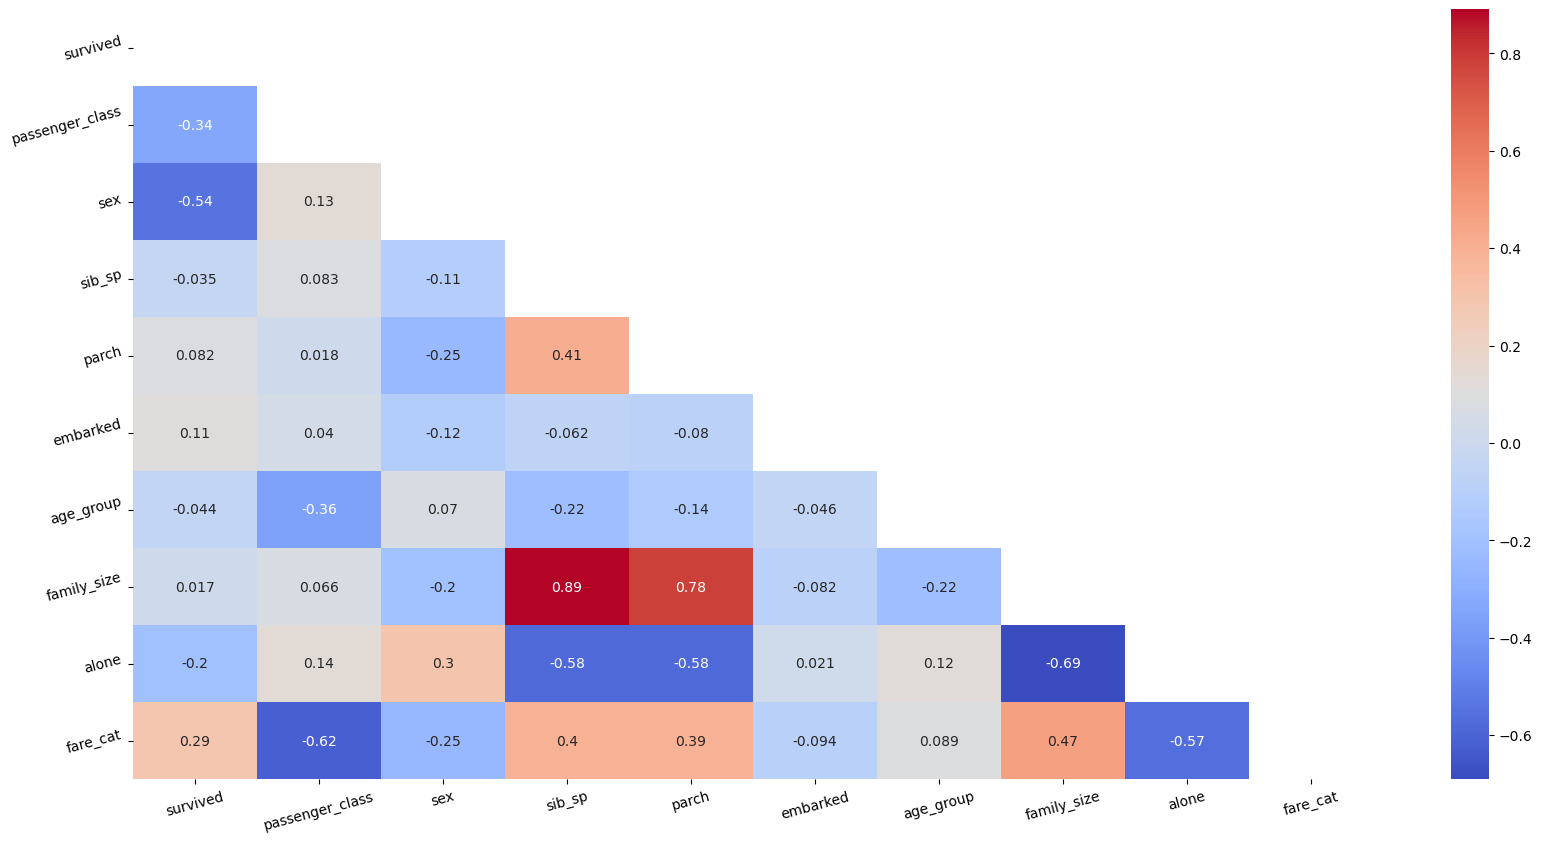

In [102]:
plt.figure(figsize=(20,10))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, mask=matrix, cmap='coolwarm')
plt.xticks(rotation=15)
plt.yticks(rotation=15)
plt.show()

As we can see on the above correlation plot, 'sib_sp' and 'parch' presented a positive relation with 'family_size’ while alone presented a negative relation with 'family_size'.

*********

### 3. Testing the models

In this section, our objective is to identify the optimal combination of scaler and machine learning classifier that yields the most effective predictive model for classifying whether an individual survived the Titanic disaster

In [103]:
# Assigning our features to X 
X = df.drop(['survived'], axis=1)

# Assigning our target to y 
y = df['survived']

# Check 
display(X)
print(y)

,passenger_class,sex,sib_sp,parch,embarked,age_group,family_size,alone,fare_cat
0,3,1,1,0,0,1,1,0,0
1,1,0,1,0,1,2,1,0,3
2,3,0,0,0,0,1,0,1,1
3,1,0,1,0,0,2,1,0,3
4,3,1,0,0,0,2,0,1,1
...,...,...,...,...,...,...,...,...,...
886,2,1,0,0,0,1,0,1,1
887,1,0,0,0,0,1,0,1,2
888,3,0,1,2,0,1,3,0,2
889,1,1,0,0,1,1,0,1,2


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64


In [104]:
# Splitting our data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42,
                                                    stratify=y)

# Check 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(668, 9) (223, 9) (668,) (223,)


Now that we have our `X_train` and `X_test`, let's transform them with our two different scalers. 

We need to remember to follow the 3 following steps: 
1. Instantiate the scaler
2. Fit the scaler to the **training** data 
3. Transform both the training and test features

**MinMaxScaler**

In [105]:
# Instantiate the scaler
MM = MinMaxScaler()

# Fit the scaler and transform both data subsets
X_train_mm = MM.fit_transform(X_train)     # we can fit and transform 'X_train' in the same step
X_test_mm = MM.transform(X_test)

**StandardScaler**

In [106]:
# Instantiate the scaler
SS = StandardScaler()

# Fit the scaler and transform both data subsets
X_train_ss = SS.fit_transform(X_train)
X_test_ss = SS.transform(X_test)

**Let's fit the different Sklearn Machine Learning Classifiers

#### - Logistic Regression

We will start with the `LogisticRegression()` and try out different C values.

**the smaller the `C`, the greater the regularization strength**.

By trying out different C values and checking the model's accuracy scores, we are trying to find the sweet spot where we're neither too harsh nor too leniant.

**Fitting Logistic Regression model to normalized data**

We will use a **for** loop to test each values of **C** in turn. Soon, we will learn about other functions in *scikit learn* which can make this process much more automated.

In [107]:
start = time.time()

# The C_values to try
C_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

# Empty lists to append train and test accuracy scores to 
train_acc_mm = []
test_acc_mm = []

# Loop through the different C values
for C in C_values:

    # Instantiate the model, increase max_iter to 1000 
    logit = LogisticRegression(C=C, max_iter=1000, random_state=42)

    # Fit the model 
    logit.fit(X_train_mm, y_train)

    # Score the model 
    train_acc_mm.append(logit.score(X_train_mm, y_train))
    test_acc_mm.append(logit.score(X_test_mm, y_test))

stop = time.time()
runtime_logit_mm = stop-start
print(f"Runtime: {round(runtime_logit_mm,2)} seconds")

Runtime: 0.06 seconds


Visualizing the accuracy scores for the different C values: 

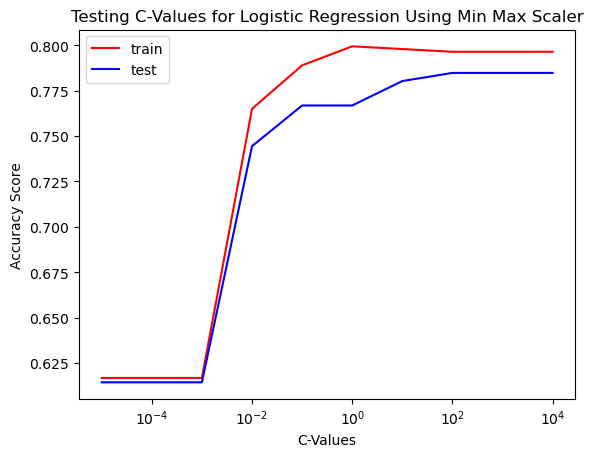

In [108]:
# visualize accuracies for different C-values
plt.figure()
plt.plot(C_values, train_acc_mm, c='red', label='train')
plt.plot(C_values, test_acc_mm, c='blue', label='test')
plt.xscale('log')
plt.xlabel('C-Values')
plt.ylabel('Accuracy Score')
plt.title('Testing C-Values for Logistic Regression Using Min Max Scaler')
#plt.axvline(0.1, linestyle='--')
#plt.axvline(1, linestyle='--')
plt.legend()
plt.show()

There is justification to select `C = 0.1` (10<sup>-1</sup>) because the plots begin to level off at this point. However, C of 10<sup>0</sup> = 1 appears to be optimal as the train and test accuracy scores were closest while still being high.

In [109]:
# Getting our best Logistic Regression
# Instantiate the model 
logit_mm = LogisticRegression(C=1, random_state=42)

# Fit the model 
logit_mm.fit(X_train_mm, y_train)

# Store accuracy scores
logit_mm_train = logit_mm.score(X_train_mm, y_train)
logit_mm_test = logit_mm.score(X_test_mm, y_test)

# Score the model 
print(f"Train Accuracy: {logit_mm_train}")
print(f"Test Accuracy: {logit_mm_test}")

Train Accuracy: 0.7994011976047904
Test Accuracy: 0.7668161434977578


Fitting Logistic Regression model to standardized data

In [110]:
start = time.time()

# Empty lists to append the training and test accuracy scores to  
train_acc_ss = []
test_acc_ss = []

# Loop through the same C values 
for C in C_values:

    # Instantiate the model 
    logit=LogisticRegression(C=C, max_iter=1000, random_state=42)

    # Fit the model 
    logit.fit(X_train_ss, y_train)

    # Score the model 
    train_acc_ss.append(logit.score(X_train_ss, y_train))
    test_acc_ss.append(logit.score(X_test_ss, y_test))
    
stop = time.time()
runtime_logit_ss = stop-start
print(f"Runtime: {round(runtime_logit_ss,2)} seconds")

Runtime: 0.03 seconds


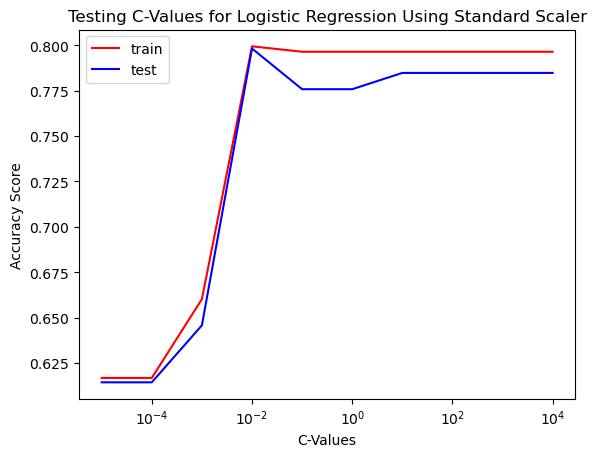

In [111]:
# Plotting the train and test scores for every C value 
plt.figure()
plt.plot(C_values, train_acc_ss, c='red', label='train')
plt.plot(C_values, test_acc_ss, c='blue', label='test')
plt.xscale('log')
plt.xlabel('C-Values')
plt.ylabel('Accuracy Score')
plt.title('Testing C-Values for Logistic Regression Using Standard Scaler')
#plt.axvline(.01, linestyle = '--')
plt.legend()
plt.show()

In this case, our optimal Logistic Regression model was achieved with C set to 10<sup>-2</sup> (0.01). The discernible elbow in the curve signifies the completion of the bulk of learning, suggesting a point beyond which overfitting might become a concern. Now, let's assess the performance of the model:

In [112]:
# The Logistic Regression that performed the best on the standardized data 
# Instantiate the model
logit_ss = LogisticRegression(C=0.01, random_state=42)

# Fit the model 
logit_ss.fit(X_train_ss, y_train)

# Store accuracy scores
logit_ss_train = logit_ss.score(X_train_ss, y_train)
logit_ss_test = logit_ss.score(X_test_ss, y_test)

# Score the model 
print(f"Train Accuracy: {logit_ss_train}")
print(f"Test Accuracy: {logit_ss_test}")

Train Accuracy: 0.7994011976047904
Test Accuracy: 0.7982062780269058


We observe that the training accuracy is identical for each of our fitted models. However, the model fitted to standardized data gives lower test accuracy.

Plotting Both the Scalers on Same Plot for Logistic Regression <a id="1"></a>

We can plot the results for both the scalers on the same plot to see the difference that the scaling has made. 

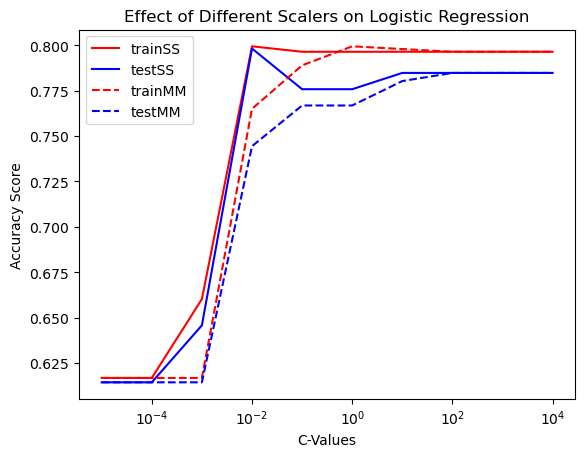

In [113]:
# Plotting the train and test scores for every C value 
plt.figure()
plt.plot(C_values, train_acc_ss, c='red', label='trainSS')
plt.plot(C_values, test_acc_ss, c='blue', label='testSS')
plt.plot(C_values, train_acc_mm, linestyle = '--', c='red', label='trainMM')
plt.plot(C_values, test_acc_mm, linestyle = '--', c='blue', label='testMM')
plt.xscale('log')
plt.xlabel('C-Values')
plt.ylabel('Accuracy Score')
plt.title('Effect of Different Scalers on Logistic Regression')
plt.legend()
plt.show()

#### - K-Nearest Neighbors
Let's try `KNeighborsClassifier()`. We will try different `n_neighbors` for both sets of transformed data again. 

- n_neighbors parameter `K` is the number of nearest neighbors, when the value of `K` is too low, the model picks only the values that are closest to the data sample, thus forming a very complex decision boundary. Such a model fails to generalize well on the test data set, thereby showing poor results.

Fitting KNN model to normalized data

In [114]:
start = time.time()

# The different K values to try out and save to 'neighbors'
neighbors = range(1, 50)

# Empty lists to append the accuracies to 
train_acc_mm = []
test_acc_mm = []

# Loop through neighbors
for K in neighbors:
    
    # Instantiate the model 
    knn = KNeighborsClassifier(n_neighbors=K)
    
    # Fit the model 
    knn.fit(X_train_mm, y_train)
    
    # Score the model 
    train_acc_mm.append(knn.score(X_train_mm, y_train))
    test_acc_mm.append(knn.score(X_test_mm, y_test))
    
stop = time.time()
runtime_knn_mm = stop-start
print(f"Runtime: {round(runtime_knn_mm,2)} seconds")

Runtime: 0.92 seconds


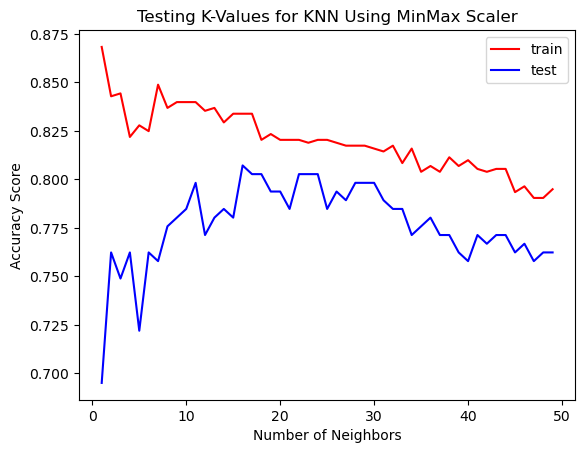

In [115]:
# Plot the accuracies 
plt.figure()
plt.plot(neighbors, train_acc_mm, c='red', label='train')
plt.plot(neighbors, test_acc_mm, c='blue', label='test')
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy Score")
plt.title('Testing K-Values for KNN Using MinMax Scaler')
#plt.axvline(41, linestyle = '--')
plt.legend()
plt.show()

These plots are quite choppy so conclusions will be somewhat subjective. However, the gap between the two plots is at its narrowest at around `n_neighbors = 32`.

In [116]:
# KNN that performed best on scaled data
# Instantiate the model
knn_mm = KNeighborsClassifier(n_neighbors=41)

# Fit the model 
knn_mm.fit(X_train_mm, y_train)

# Store accuracy scores
knn_mm_train = knn_mm.score(X_train_mm, y_train)
knn_mm_test = knn_mm.score(X_test_mm, y_test)

# Score the model 
print(f"Train Accuracy: {knn_mm_train}")
print(f"Test Accuracy: {knn_mm_test}")

Train Accuracy: 0.8053892215568862
Test Accuracy: 0.7713004484304933


Fitting KNN model to normalized data


In [117]:
start = time.time()

# Empty lists to append to 
train_acc_ss = []
test_acc_ss = []

# Loop through the neighbors 
for k in neighbors: 
    
    # Instantiate the model 
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model 
    knn.fit(X_train_ss, y_train)
    
    # Score the model 
    train_acc_ss.append(knn.score(X_train_ss, y_train))
    test_acc_ss.append(knn.score(X_test_ss, y_test))
    
stop = time.time()
runtime_knn_ss = stop-start
print(f"Runtime: {round(runtime_knn_ss,2)} seconds")

Runtime: 1.01 seconds


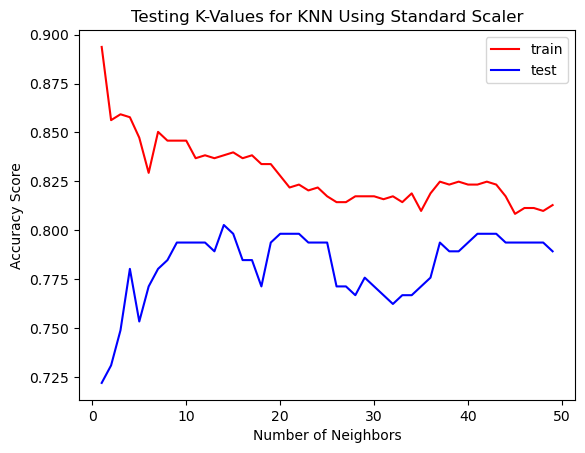

In [118]:
# Plot the accuracies
plt.figure()
plt.plot(neighbors, train_acc_ss, c='red', label='train')
plt.plot(neighbors, test_acc_ss, c='blue', label='test')
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy Score")
plt.title('Testing K-Values for KNN Using Standard Scaler')
#plt.axvline(11, linestyle = '--')
#plt.axvline(23, linestyle = '--')
plt.legend()
plt.show()

There are defintely arguments for `n_neighbors=20` (test accuracy peaks) or `n_neighbors=25` (the 'gap' is at its narrowest).

In [119]:
# Best KNN on standardized data
# Instantiate the model 
knn_ss = KNeighborsClassifier(n_neighbors=23)

# Fit the model 
knn_ss.fit(X_train_ss, y_train)

# Store accuracy scores
knn_ss_train = knn_ss.score(X_train_ss, y_train)
knn_ss_test = knn_ss.score(X_test_ss, y_test)

# Score the model 
print(f"Train Accuracy: {knn_ss_train}")
print(f"Test Accuracy: {knn_ss_test}")

Train Accuracy: 0.8203592814371258
Test Accuracy: 0.7937219730941704


#### - Decision Tree

Now we will fit sklearn's `DecisionTreeClassifier()` with different `max_depth` values for both sets of transformed data. 

The parameter `max_depth` is what the name suggests: the maximum depth that you allow the tree to grow to. Without this, a decision tree classifier will continue until it has split every data point i.e. overfitting; the model will predict the training values but it will not perform well with unseen data.

Fitting Decision Tree model to normalized data

In [120]:
# number of rows
X_train.shape[0]

668

In [121]:
# indicating range of max_depth values
range(1, int(np.sqrt(X_train.shape[0])))

range(1, 25)

In [122]:
start = time.time()

# A list of the maximum depths to try out and save to 'depths'
depths = range(1, int(np.sqrt(X_train.shape[0])))

# Empty lists to append to
train_acc_mm = []
test_acc_mm = []

# Loop through the depths
for max_depth in depths:
    
    # Instantiate the model 
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    
    # Fit the model 
    dt.fit(X_train_mm, y_train)
    
    # Score the model 
    train_acc_mm.append(dt.score(X_train_mm, y_train))
    test_acc_mm.append(dt.score(X_test_mm, y_test))
    
stop = time.time()
runtime_dt_mm = stop-start
print(f"Runtime: {round(runtime_dt_mm,2)} seconds")

Runtime: 0.04 seconds


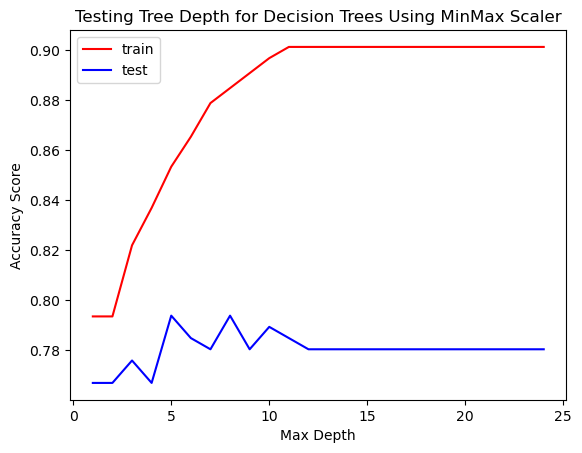

In [123]:
# Plotting the accuracies
plt.figure()
plt.plot(depths, train_acc_mm, c='red', label='train')
plt.plot(depths, test_acc_mm, c='blue', label='test')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
plt.title('Testing Tree Depth for Decision Trees Using MinMax Scaler')
#plt.axvline(4, linestyle = '--')
plt.legend()
plt.show()

Intuitively, we select `max_depth=5` as the model begins to overfit to the training data beyond this point and test accuracy is approaching its peak.

In [125]:
# Best Decision Tree Classifier on normalized data
# Instantiate the model 
dt_mm = DecisionTreeClassifier(max_depth=5, random_state=42)

# Fit the model 
dt_mm.fit(X_train_mm, y_train)

# Store accuracy scores
dt_mm_train = dt_mm.score(X_train_mm, y_train)
dt_mm_test = dt_mm.score(X_test_mm, y_test)

# Score the model 
print(f"Train Accuracy: {dt_mm_train}")
print(f"Test Accuracy: {dt_mm_test}")

Train Accuracy: 0.8532934131736527
Test Accuracy: 0.7937219730941704


Fitting Decision Tree model to standardized data

In [126]:
start = time.time()

# Empty lists to append to 
train_acc_ss = []
test_acc_ss = []

# Loop through the different depths
for max_depth in depths: 
    
    # Instantiate the model 
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    
    # Fit the model 
    dt.fit(X_train_ss, y_train)
    
    # Score the model 
    train_acc_ss.append(dt.score(X_train_ss, y_train))
    test_acc_ss.append(dt.score(X_test_ss, y_test))
    
stop = time.time()
runtime_dt_ss = stop-start
print(f"Runtime: {round(runtime_dt_ss,2)} seconds")

Runtime: 0.03 seconds


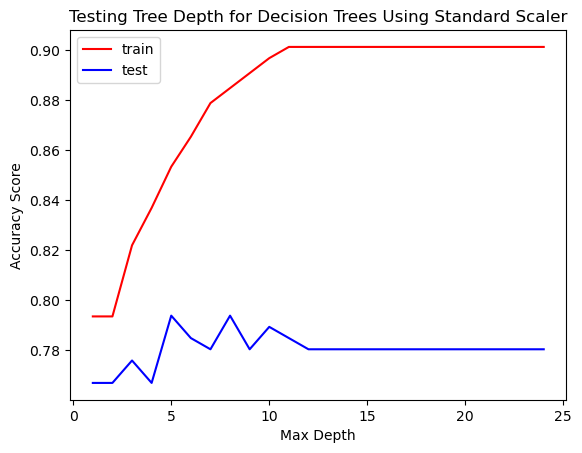

In [127]:
# Plot the accuracies
plt.figure()
plt.plot(depths, train_acc_ss, c='red', label='train')
plt.plot(depths, test_acc_ss, c='blue', label='test')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
plt.title('Testing Tree Depth for Decision Trees Using Standard Scaler')
#plt.axvline(4, linestyle = '--')
plt.legend()
plt.show()

Once again, `max_depth=5` appears to be optimal.

In [128]:
# Best Decision Tree Classifier on standardized data
# Instantiate the model 
dt_ss = DecisionTreeClassifier(max_depth=5, random_state=42)

# Fit the model 
dt_ss.fit(X_train_ss, y_train)

# Store accuracy scores
dt_ss_train = dt_ss.score(X_train_ss, y_train)
dt_ss_test = dt_ss.score(X_test_ss, y_test)

# Score the model 
print(f"Train Accuracy: {dt_ss_train}")
print(f"Test Accuracy: {dt_ss_test}")

Train Accuracy: 0.8532934131736527
Test Accuracy: 0.7937219730941704


###### Plotting Both the Scalers on the Same Plot <a id="2"></a>

Before we plot the Decision Tree scalers on the same plot, [let's go back up to see how much it differed for Logistic Regression](#1). 

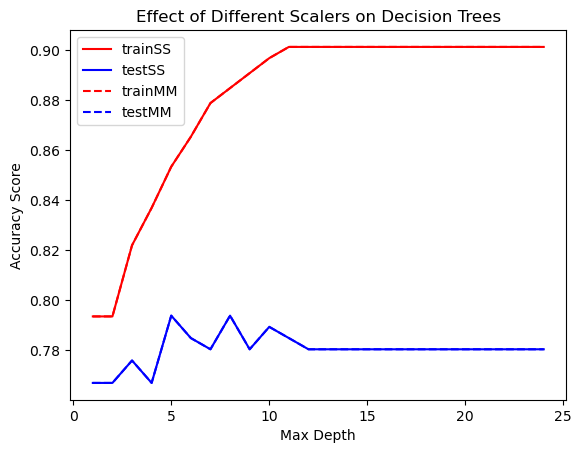

In [129]:
# Plot the accuracies
plt.figure()
plt.plot(depths, train_acc_ss, c='red', label='trainSS')
plt.plot(depths, test_acc_ss, c='blue', label='testSS')
plt.plot(depths, train_acc_mm, linestyle = '--', c='red', label='trainMM')
plt.plot(depths, test_acc_mm, linestyle = '--', c='blue', label='testMM')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
plt.title('Effect of Different Scalers on Decision Trees')
plt.legend()
plt.show()

As we can see above, the difference for `DecisionTreeClassifier()` based on scalers is minimal (as opposed to Logistic Regression or others). This is because every split or decision is made based on a single attribute at a time. Decision Tree Classifiers are insensitive to different scales! 

*In conclusion, we did not need to scale our data for this model type.*

#### - Support Vector Machine

Lastly, we will fit Support Vector Machine (SVM) models with its default kernel - radial basis function - to different `C` values.

The `C` parameter tells the SVM optimization how much you want to avoid misclassifying each training data point.

We are faced with a trade-off: increase the 'margin' (low C) to allow more data to be misclassified; decrease the margin of error (high C) to in an attempt to realize higher accuracy. The answer to this dilemma is dependent on the need for high accuracy in the particular use case.

Fitting Support Vector Machine to normalized data

In [130]:
start = time.time()

# Empty lists to append to 
train_acc_mm = []
test_acc_mm = []

# Looping through the C_values used earlier in Logistic Regression
for C in C_values: 
    
    # Instantiate the model 
    svm = SVC(C=C, max_iter=2000, random_state=42)
    
    # Fit
    svm.fit(X_train_mm, y_train)
    
    # Score
    train_acc_mm.append(svm.score(X_train_mm, y_train))
    test_acc_mm.append(svm.score(X_test_mm, y_test))
    
stop = time.time()
runtime_svm_mm = stop-start
print(f"Runtime: {round(runtime_svm_mm,2)} seconds")

Runtime: 0.34 seconds


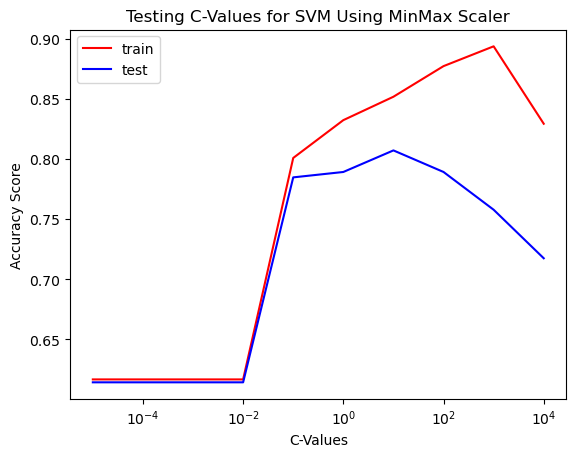

In [131]:
# Plotting the accuracies
plt.figure()
plt.plot(C_values, train_acc_mm, c='red', label='train')
plt.plot(C_values, test_acc_mm, c='blue', label='test')
plt.legend()
plt.xscale('log')
plt.xlabel('C-Values')
plt.ylabel('Accuracy Score')
plt.title('Testing C-Values for SVM Using MinMax Scaler')
#plt.axvline(0.1, linestyle = '--')
#plt.axvline(1, linestyle = '--')
plt.show()

Based on the above plots, we will select `C = 1` (10<sup>0</sup>). At `C = 0.1`, the increase in accuracy scores begins to slow but the 'gap' between train and test accuracy is equally narrow at `C = 1`; test accuracy also peaks at this point.

In [132]:
# Getting the SVM that best performed on the scaled data
# Instantiate the model 
svm_mm = SVC(C=1, max_iter=2000, random_state=42)

# Fit the model 
svm_mm.fit(X_train_mm, y_train)

# Store accuracy scores
svm_mm_train = svm_mm.score(X_train_mm, y_train)
svm_mm_test = svm_mm.score(X_test_mm, y_test)

# Score the model 
print(f"Train Accuracy: {svm_mm_train}")
print(f"Test Accuracy: {svm_mm_test}")

Train Accuracy: 0.8323353293413174
Test Accuracy: 0.7892376681614349


Fitting Support Vector Machine to standardized data

In [133]:
start = time.time()

# Empty lists to append to 
train_acc_ss = []
test_acc_ss = []

# Looping through the C_values from earlier
for C in C_values: 
    
    # Instantiate the model 
    svm = SVC(C=C, max_iter=2000, random_state=42)
    
    # Fit
    svm.fit(X_train_ss, y_train)
    
    # Score
    train_acc_ss.append(svm.score(X_train_ss, y_train))
    test_acc_ss.append(svm.score(X_test_ss, y_test))
    
stop = time.time()
runtime_svm_ss = stop-start
print(f"Runtime: {round(runtime_svm_ss,2)} seconds")

Runtime: 0.35 seconds


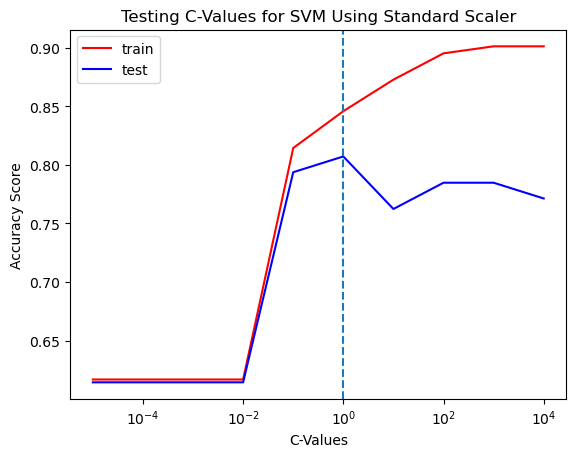

In [134]:
# Plotting the accuracies
plt.figure()
plt.plot(C_values, train_acc_ss, c='red', label='train')
plt.plot(C_values, test_acc_ss, c='blue', label='test')
plt.legend()
plt.xscale('log')
plt.xlabel('C-Values')
plt.ylabel('Accuracy Score')
plt.title('Testing C-Values for SVM Using Standard Scaler')
plt.axvline(1, linestyle = '--')
plt.show()

Once again, `C = 1` seems an appropriate choice. In fact, these plots seem identical to those for normalized data. However, look at the scales: the increase in accuracy scores is steeper between **C=0.01** and **C=0.1** for the model on standardized data.

In [135]:
# Getting the SVM that performed best on the standardized data
# Instantiate the model 
svm_ss = SVC(C=1, random_state=42)

# Fit the model 
svm_ss.fit(X_train_ss, y_train)

# Store accuracy scores
svm_ss_train = svm_ss.score(X_train_ss, y_train)
svm_ss_test = svm_ss.score(X_test_ss, y_test)

# Score the model 
print(f"Train Accuracy: {svm_ss_train}")
print(f"Test Accuracy: {svm_ss_test}")

Train Accuracy: 0.8458083832335329
Test Accuracy: 0.8071748878923767


In [136]:
# Making list of each classifiers train and test scores as well as times for both scalers
train_mm_scores = [logit_mm_train, knn_mm_train, dt_mm_train, svm_mm_train]
test_mm_scores = [logit_mm_test, knn_mm_test, dt_mm_test, svm_mm_test]
runtimes_mm = [runtime_logit_mm, runtime_knn_mm, runtime_dt_mm, runtime_svm_mm]
train_ss_scores = [logit_ss_train, knn_ss_train, dt_ss_train, svm_ss_train]
test_ss_scores = [logit_ss_test, knn_ss_test, dt_ss_test, svm_ss_test]
runtimes_ss = [runtime_logit_ss, runtime_knn_ss, runtime_dt_ss, runtime_svm_ss]

# Labelling the rows
rows = ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree Classifier', 'Support Vector Machine']

# Turning into a dataframe
model_summary = pd.DataFrame(list(zip(train_mm_scores, test_mm_scores, runtimes_mm, train_ss_scores, test_ss_scores, runtimes_ss)),
                             index=rows,
                             columns=pd.MultiIndex.from_product([['MinMaxScaler()','StandardScaler()'],
                                                                 ['Train data', 'Test data', 'Runtime(sec)']]))

model_summary

MinMaxScaler()                         \
                             Train data Test data Runtime(sec)   
Logistic Regression            0.799401  0.766816     0.063295   
K-Nearest Neighbors            0.805389  0.771300     0.917705   
Decision Tree Classifier       0.853293  0.793722     0.039509   
Support Vector Machine         0.832335  0.789238     0.343411   

                         StandardScaler()                         
                               Train data Test data Runtime(sec)  
Logistic Regression              0.799401  0.798206     0.033885  
K-Nearest Neighbors              0.820359  0.793722     1.011106  
Decision Tree Classifier         0.853293  0.793722     0.025742  
Support Vector Machine           0.845808  0.807175     0.348125

*Note that the KNN model tends to take longer to compute. Runtime will vary according to computer specifications. However, it is worth remembering that this was a very small dataset so this might become a consideration on larger datasets.*

Based solely on **prediction accuracy**, the scaler/model combination which best classified the survival of Titanic passengers was: 

- Standardizing the data with the `StandardScaler()` 

- Fitting a `SVC(C=1)` model to the transformed data. 

However, we should be mindful that is based purely on an assumption that maximizing accuracy is our primary aim. 

### Futher evaluation:

**Confusion Matrix**

In [140]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(svm_ss, X_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[368,  44],
       [ 78, 178]], dtype=int64)

The first row is about the not-survived-predictions: 368 passengers were correctly classified as not survived (called true negatives) and 44 where wrongly classified as not survived (false positives).

The second row is about the survived-predictions: 78 passengers where wrongly classified as survived (false negatives) and 178 where correctly classified as survived (true positives).

A confusion matrix gives you a lot of information about how well your model does, but theres a way to get even more, like computing the classifiers precision.

**Precision and Recall**

In [141]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))


Precision: 0.8018018018018018
Recall: 0.6953125


Our model predicts 81% of the time, a passengers survival correctly (precision). The recall tells us that it predicted the survival of 70 % of the people who actually survived.

The F-score is a metric that combines both precision and recall into a single value. It is particularly useful in situations where there is an uneven class distribution, and you want to balance the trade-off between precision and recall.

In this formula:

Precision is the ratio of true positive predictions to the total predicted positives.
Recall is the ratio of true positive predictions to the total actual positives.
The F1-score ranges from 0 to 1, where 1 indicates perfect precision and recall, and 0 indicates poor performance in either precision or recall.

Computing the F1-score provides a more comprehensive evaluation of the model's overall performance, especially when both precision and recall are important considerations.

In [145]:
from sklearn.metrics import f1_score
f1_score(y_train, predictions)

0.7447698744769874

Here we observe a 75% F-score, indicating a balanced performance. However, the score is tempered by a recall of 70%. The F-score, though valuable, is not flawless as it tends to favor classifiers with comparable precision and recall. This poses a challenge because optimal outcomes may demand prioritizing either high precision or high recall. The precision/recall tradeoff becomes evident, where enhancing one metric often leads to a reduction in the other, depending on the chosen threshold.

### Conclusion

We initiated our analysis with a comprehensive data exploration, gaining insights into the dataset, addressing missing data, and identifying key features. Visualization tools such as Seaborn and Matplotlib aided us in this process. Subsequently, during the data preprocessing phase, we handled missing values, transformed features into numerical formats, categorized values, and introduced new features.

Moving forward, we trained diverse machine learning models. After careful consideration, we selected the SVM model and subjected it to cross-validation. Our exploration extended to understanding the inner workings of the SVM, examining the importance assigned to different features. In the final stages, we scrutinized the confusion matrix and calculated essential metrics, including precision, recall, and F-score.